In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt



In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
    ])

transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # N, 1, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # -> N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7) # -> N, 64, 1, 1
        )
        
        # N , 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), # -> N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [5]:
model = Autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)


In [6]:
# Point to training loop video
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))


Epoch:1, Loss:0.0087
Epoch:2, Loss:0.0054
Epoch:3, Loss:0.0043
Epoch:4, Loss:0.0035
Epoch:5, Loss:0.0033
Epoch:6, Loss:0.0030
Epoch:7, Loss:0.0034
Epoch:8, Loss:0.0027
Epoch:9, Loss:0.0031
Epoch:10, Loss:0.0029


In [16]:
import os
os.getcwd()
save_path = '/kaggle/working/saved_autoenc'
print(save_path)


/kaggle/working/saved_autoenc


In [17]:

torch.save(model.state_dict(), save_path)

In [18]:
newModel = Autoencoder()


In [19]:
newModel.load_state_dict(torch.load(save_path))


<All keys matched successfully>

In [20]:
dataiter = iter(data_loader)
images, labels = dataiter.next()


In [22]:
print(np.shape(images[1]))

torch.Size([1, 28, 28])


tensor([[[ 0.4068]],

        [[ 1.8867]],

        [[-1.2543]],

        [[ 1.4319]],

        [[-2.2951]],

        [[ 2.7867]],

        [[ 2.6082]],

        [[-1.0604]],

        [[ 2.9317]],

        [[ 0.8646]],

        [[ 2.2818]],

        [[ 5.1937]],

        [[-0.0491]],

        [[ 2.6424]],

        [[-1.1919]],

        [[-0.5828]],

        [[-3.6821]],

        [[ 2.1907]],

        [[ 2.0505]],

        [[ 2.7922]],

        [[-1.2415]],

        [[ 1.9875]],

        [[ 1.4660]],

        [[ 2.9056]],

        [[ 6.1248]],

        [[ 0.4882]],

        [[ 4.5303]],

        [[ 3.3429]],

        [[-2.5662]],

        [[ 4.4411]],

        [[-0.8746]],

        [[ 3.4060]],

        [[-3.0946]],

        [[-3.2565]],

        [[ 2.3717]],

        [[ 7.1213]],

        [[ 3.2060]],

        [[-3.6200]],

        [[18.9837]],

        [[ 0.9696]],

        [[ 4.5435]],

        [[-0.7449]],

        [[ 6.5464]],

        [[ 3.7793]],

        [[ 0.2814]],

        [[

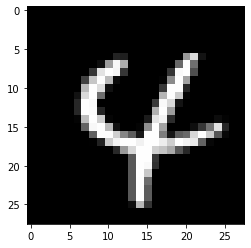

In [30]:
code = newModel.encoder(images[50])
print (code)
image = np.squeeze(images[50].detach().numpy(), axis = 0)
plt.gray()
plt.imshow(image)

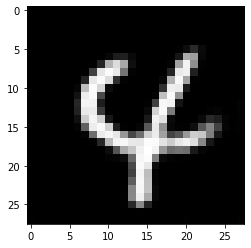

In [31]:
reconstructedImage = newModel.decoder(code)
image = np.squeeze(reconstructedImage.detach().numpy(), axis = 0)
plt.gray()
plt.imshow(image)

